<a href="https://colab.research.google.com/github/Renata-Thomazelli/mentoria2021/blob/main/temperatura_media_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando Temperatura média**

---

In [1]:
# Importing Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing 
import pandas as pd
import numpy as np
import chardet
import missingno as msno

**Reading CSV**

In [3]:
file_path ='/content/drive/MyDrive/Data_Lake/temperatura_preciptacao/'
tipo = 'tas_'
anos ='1901_2020_'
pais = "CAN"

file = f"{tipo}{anos}{pais}.csv"

In [4]:
with open(f"{file_path}{file}", 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [5]:
arquivo = f"{tipo}{pais}"
with open (f"{file_path}{file}",'r',encoding=r_encoding['encoding']) as arquivo :
  df_tas = pd.read_csv(arquivo)

## **DataFrame**

In [6]:
df_tas

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-25.3,1901,Jan Average,Canada,CAN
1,-24.7,1901,Feb Average,Canada,CAN
2,-19.2,1901,Mar Average,Canada,CAN
3,-10.3,1901,Apr Average,Canada,CAN
4,-0.2,1901,May Average,Canada,CAN
...,...,...,...,...,...
1435,10.2,2020,Aug Average,Canada,CAN
1436,3.7,2020,Sep Average,Canada,CAN
1437,-5.4,2020,Oct Average,Canada,CAN
1438,-14.4,2020,Nov Average,Canada,CAN


In [7]:
df_tas.shape

(1440, 5)

In [8]:
df_tas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  1440 non-null   float64
 1    Year                    1440 non-null   int64  
 2    Statistics              1440 non-null   object 
 3    Country                 1440 non-null   object 
 4    ISO3                    1440 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 56.4+ KB


In [9]:
#identificando as columns
df_tas.columns

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [10]:
# #executando a limpeza no nome das colunas
colunas = [c.strip().lower().replace(" ","_") for c in df_tas.columns]
df_tas.columns = colunas
   

df_tas.head(5)

,temperature_-_(celsius),year,statistics,country,iso3
0,-25.3,1901,Jan Average,Canada,CAN
1,-24.7,1901,Feb Average,Canada,CAN
2,-19.2,1901,Mar Average,Canada,CAN
3,-10.3,1901,Apr Average,Canada,CAN
4,-0.2,1901,May Average,Canada,CAN


In [11]:
df_tas.columns

Index(['temperature_-_(celsius)', 'year', 'statistics', 'country', 'iso3'], dtype='object')

In [12]:
def replace (col): 
    return col.replace(" Average",'').strip()

In [13]:
 renomeando = {'temperature_-_(celsius)':'temp_celsius', 'statistics':'month'}

In [14]:
def year_season(row):
    seasons = {"spring":["Mar","Apr","May"], 'summer':["Jun","Jul","Aug"],'autumn':['Sep',"Oct","Nov"],'winter':["Dec","Jan","Feb"]}
    key_list = list(seasons.keys())
    val_list = list(seasons.values())
    for meses in seasons.values():
        for m in meses:
            if m == row['month']:
                indice =val_list.index(meses)
                #print(indice,meses)
                #print(key_list[indice])
                return key_list[indice]

In [15]:
#Filtrando anos a partir de 1960, limpando e renomeando as colunas
df_tas_test_season=\
(
    df_tas.loc[df_tas['year']>=1960,:]
    .rename(columns=renomeando)
    .set_index("month")
    .rename(index=replace)
    .reset_index()
    
    
)

df_tas_test_season

,month,temp_celsius,year,country,iso3
0,Jan,-24.0,1960,Canada,CAN
1,Feb,-20.9,1960,Canada,CAN
2,Mar,-21.5,1960,Canada,CAN
3,Apr,-10.4,1960,Canada,CAN
4,May,0.7,1960,Canada,CAN
...,...,...,...,...,...
727,Aug,10.2,2020,Canada,CAN
728,Sep,3.7,2020,Canada,CAN
729,Oct,-5.4,2020,Canada,CAN
730,Nov,-14.4,2020,Canada,CAN


In [16]:
#incluindo a coluna season
df_tas_season =df_tas_test_season.assign(season = df_tas_test_season.apply(year_season,axis=1))



In [17]:
df_tas_season

,month,temp_celsius,year,country,iso3,season
0,Jan,-24.0,1960,Canada,CAN,winter
1,Feb,-20.9,1960,Canada,CAN,winter
2,Mar,-21.5,1960,Canada,CAN,spring
3,Apr,-10.4,1960,Canada,CAN,spring
4,May,0.7,1960,Canada,CAN,spring
...,...,...,...,...,...,...
727,Aug,10.2,2020,Canada,CAN,summer
728,Sep,3.7,2020,Canada,CAN,autumn
729,Oct,-5.4,2020,Canada,CAN,autumn
730,Nov,-14.4,2020,Canada,CAN,autumn


In [18]:
df_tas_season.describe().T

,count,mean,std,min,25%,50%,75%,max
temp_celsius,732.0,-6.828142,12.736820,-30.4,-19.2,-6.45,5.675,12.8
year,732.0,1990.000000,17.618856,1960.0,1975.0,1990.00,2005.000,2020.0


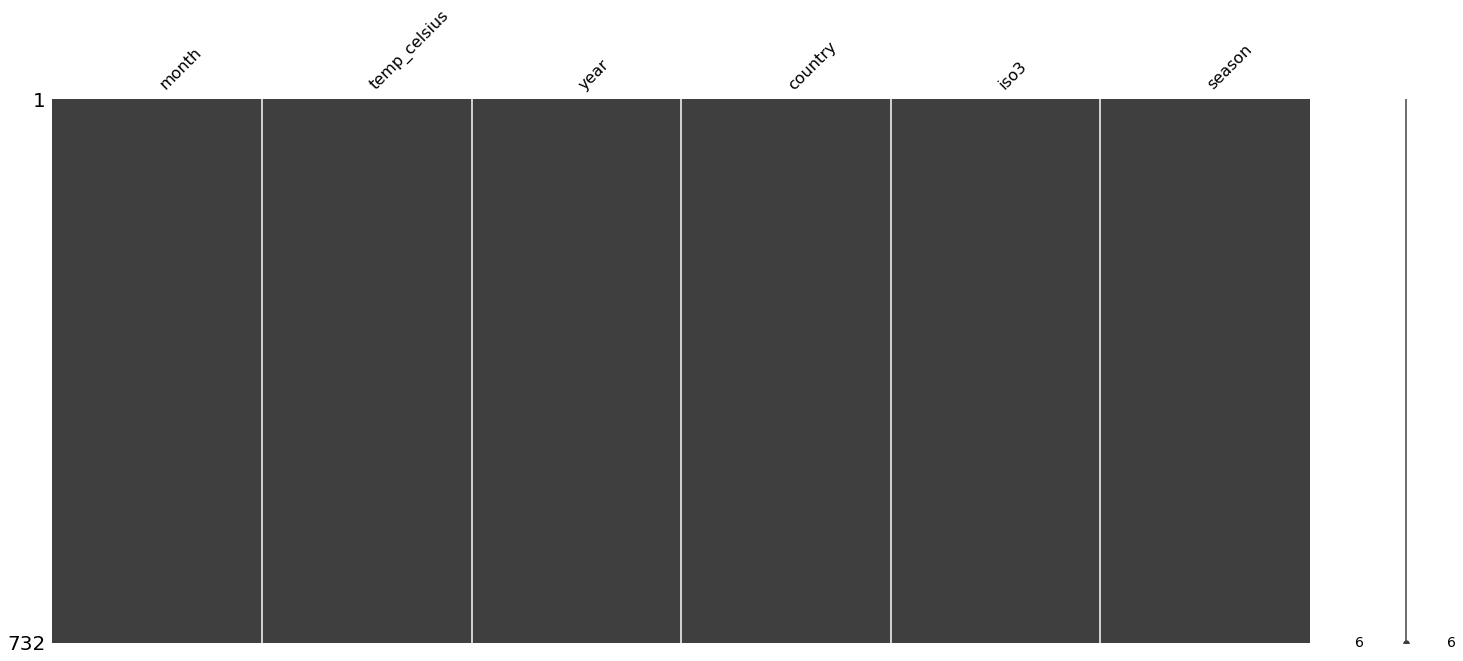

In [19]:
#verificando valores NA
msno.matrix(df_tas_season)

## **Verifying and changing dtypes to improve memory usage**

In [20]:
#Verificando o shape
df_tas_season.shape


(732, 6)

In [21]:
#Verificando tipos e memory usage
original_info = df_tas_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         732 non-null    object 
 1   temp_celsius  732 non-null    float64
 2   year          732 non-null    int64  
 3   country       732 non-null    object 
 4   iso3          732 non-null    object 
 5   season        732 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 34.4+ KB


In [22]:
#Verifying memory usage
original_mem = df_tas_season.memory_usage(deep=True)
original_mem

Index             128
month           43920
temp_celsius     5856
year             5856
country         46848
iso3            44652
season          46116
dtype: int64

In [23]:
#Checking the low cardinality
df_tas_season.select_dtypes(include=["object"]).nunique()

month      12
country     1
iso3        1
season      4
dtype: int64

In [24]:

col_to_category = ['month',"country","iso3","season"]

#df_tas_season["temp_celsius"]=df_tas_season["temp_celsius"].astype("float16")
df_tas_season["year"]= df_tas_season["year"].astype("int32")
df_tas_season[col_to_category]=df_tas_season[col_to_category].astype("category")

    


df_tas_season

,month,temp_celsius,year,country,iso3,season
0,Jan,-24.0,1960,Canada,CAN,winter
1,Feb,-20.9,1960,Canada,CAN,winter
2,Mar,-21.5,1960,Canada,CAN,spring
3,Apr,-10.4,1960,Canada,CAN,spring
4,May,0.7,1960,Canada,CAN,spring
...,...,...,...,...,...,...
727,Aug,10.2,2020,Canada,CAN,summer
728,Sep,3.7,2020,Canada,CAN,autumn
729,Oct,-5.4,2020,Canada,CAN,autumn
730,Nov,-14.4,2020,Canada,CAN,autumn


## *Comparing memory usage*

In [25]:
#Verifying new memory usage
new_memory = df_tas_season.memory_usage(deep=True)


In [26]:
# Comparying memory usage
print("This is the original memory usage")
print(original_mem)
print("\nAnd this is the new memory usage")
print(new_memory)


This is the original memory usage
Index             128
month           43920
temp_celsius     5856
year             5856
country         46848
iso3            44652
season          46116
dtype: int64

And this is the new memory usage
Index            128
month           1772
temp_celsius    5856
year            2928
country          876
iso3             873
season          1144
dtype: int64


In [27]:
new_info = df_tas_season.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   month         732 non-null    category
 1   temp_celsius  732 non-null    float64 
 2   year          732 non-null    int32   
 3   country       732 non-null    category
 4   iso3          732 non-null    category
 5   season        732 non-null    category
dtypes: category(4), float64(1), int32(1)
memory usage: 12.3 KB


In [45]:
df_tas_season['temp_celsius'].describe().T

count    732.000000
mean      -6.828142
std       12.736820
min      -30.400000
25%      -19.200000
50%       -6.450000
75%        5.675000
max       12.800000
Name: temp_celsius, dtype: float64

In [52]:
analise_temp = df_tas_season['temp_celsius'].describe(percentiles=[0.25, 0.50, 0.75,0.99]).T

In [49]:
analise_temp

count    732.000000
mean      -6.828142
std       12.736820
min      -30.400000
25%      -19.200000
50%       -6.450000
75%        5.675000
99%       12.000000
max       12.800000
Name: temp_celsius, dtype: float64